# COVID - 19 Project #

The goal os the project is to understand this dataset, gain some insight from it. Finally to utilize sklearn to train some models of covid and make predictions.

the data set is from https://health-infobase.canada.ca/covid-19/ which consists of data related to COVID-19. There are several variables such as number of cases per day, deaths per day, provincial rates and many others. 

# 1) Setup #

Setup we will be importing linbraries, files, preliminary data analysis to get a better understanding of the data we will be working with. 

In [103]:
# import all the libraries, Pandas (data processing)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

#import linear model for linearregression and polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

#### Import data ####

Download .csv file from https://health-infobase.canada.ca/covid-19/ to follow along.

In [67]:
# open data folder from .cvs file. files are obtained from https://health-infobase.canada.ca/covid-19/
path = 'covid19.csv'

#place data into a DataFrame
df = pd.read_csv(path, header=None)

#### Data Description #### 

Show data header

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday
1,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,NaN,NaN,NaN,3,3
2,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,NaN,NaN,NaN,1,1
3,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,NaN,NaN,NaN,4,4
4,35,Ontario,Ontario,2020-02-08,3,0,0,3,NaN,NaN,NaN,NaN,0,0


#### Data information ####

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       658 non-null    object
 1   1       658 non-null    object
 2   2       658 non-null    object
 3   3       658 non-null    object
 4   4       658 non-null    object
 5   5       658 non-null    object
 6   6       648 non-null    object
 7   7       658 non-null    object
 8   8       587 non-null    object
 9   9       59 non-null     object
 10  10      55 non-null     object
 11  11      1 non-null      object
 12  12      658 non-null    object
 13  13      628 non-null    object
dtypes: object(14)
memory usage: 72.1+ KB


#### Show statistical information of dataset ###

This is not very important at this moment, but im including to remind myself of good practice.

In [72]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,658,658,658,658,658,658,648,658,587,59,55,1,658,628
unique,16,16,16,57,295,36,103,302,456,39,43,1,158,224
top,59,British Columbia,Colombie-Britannique,22-03-2020,0,0,0,0,0,0,0,ratetested,0,0
freq,56,56,56,15,90,537,414,78,38,7,3,1,242,232


# 2) Data Cleaning # 

We will be cleaning the data here, and making it esier for us to develop code for the data.


Find missing data and present in the form of a presentage, from this information we can determine which data should not be used. 

In [73]:
print('Precent data missing: ')
print((df.isnull().sum()/657)*100)

Precent data missing: 
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       1.522070
7       0.000000
8      10.806697
9      91.171994
10     91.780822
11    100.000000
12      0.000000
13      4.566210
dtype: float64


#### Data removal ####

I am removing several attributes such as:

(13) Precent per day: this is not imporant because we can do this ourselves.

(11) Test rate: 100% of this data is missing so remove it.

(10) Precent recovered: 91% of the data is missing. When more data becomes avalible, I would include this.  

(9) Number recovered: 91% of the data is missing. When more data becomes avalible, I would include this.  

(8) Number of tested: 10% of the data is missing. When more data becomes avalible, I would include this.

(2) French names: removed not requiered. 

Removing 'Repatriated Travellers' because they have very incomplete information. 

In [74]:
#reject unwanted naming conventions
# this data has NaN or utilized percet of cases /day which can be calculated if needed.
df.drop(13, axis=1, inplace=True)
df.drop(11, axis=1, inplace=True)
df.drop(10, axis=1, inplace=True)
df.drop(9, axis=1, inplace=True)
df.drop(8, axis=1, inplace=True)
df.drop(2,axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)

df = df[df[1] != 'Repatriated travellers']

#### Redefine headers ###

redefining headers to something more discriptive

In [75]:
#Set header names for data frame
headers = ["ProvinceID","ProvinceNameEN","Date","ConfirmedCases", "ProbableCases","Deceased",
         "Total","TotalToday"]
df.columns = headers

#### missing data ####

repeat missing information, to ensure we have no missing information. 

In [76]:
print('Precent data missing: ')
print((df.isnull().sum()/617)*100)

Precent data missing: 
ProvinceID        0.0
ProvinceNameEN    0.0
Date              0.0
ConfirmedCases    0.0
ProbableCases     0.0
Deceased          0.0
Total             0.0
TotalToday        0.0
dtype: float64


#### Changing dtypes ####

changing the data type

In [77]:
# Chaning data types to integers
df[["ProvinceID", "ConfirmedCases"]] = df[["ProvinceID", "ConfirmedCases"]].astype("int")
df[["ProbableCases","Deceased"]] = df[["ProbableCases","Deceased"]].astype("int")
df[["Total","TotalToday"]] = df[["Total","TotalToday"]].astype("int")

# Changing data tpye to datetime 
df[['Date']] = df[['Date']].astype("datetime64")

df.dtypes

ProvinceID                 int32
ProvinceNameEN            object
Date              datetime64[ns]
ConfirmedCases             int32
ProbableCases              int32
Deceased                   int32
Total                      int32
TotalToday                 int32
dtype: object

In [78]:
df.head()

,ProvinceID,ProvinceNameEN,Date,ConfirmedCases,ProbableCases,Deceased,Total,TotalToday
1,35,Ontario,2020-01-31,3,0,0,3,3
2,59,British Columbia,2020-01-31,1,0,0,1,1
3,1,Canada,2020-01-31,4,0,0,4,4
4,35,Ontario,2020-02-08,3,0,0,3,0
5,59,British Columbia,2020-02-08,4,0,0,4,3


#### Number of Values per Province #

For futher understanding of the data, I want to know how many entery points there are for each province. 

In [79]:
#catagorical data Display data in a different manner, this is for own personal use.
province_counts = df["ProvinceNameEN"].value_counts().to_frame()
province_counts.rename(columns={'ProvinceNameEN': 'value_counts'}, inplace=True)

province_counts.index.name = 'ProvinceNameEN'
print (province_counts)
print (df['ProvinceID'].unique())
print(df['ProvinceNameEN'].unique())

                           value_counts
ProvinceNameEN                         
British Columbia                     56
Canada                               56
Ontario                              56
Quebec                               47
Alberta                              42
Newfoundland and Labrador            40
Manitoba                             40
Nunavut                              40
Saskatchewan                         40
Prince Edward Island                 40
Nova Scotia                          40
Yukon                                40
Northwest Territories                40
New Brunswick                        40
[35 59  1 24 48 47 46 13 10 12 11 60 61 62]
['Ontario' 'British Columbia' 'Canada' 'Quebec' 'Alberta' 'Saskatchewan'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador' 'Nova Scotia'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut']


#### New Data format #

With a new Data format I am creating a new DataFrame. This is the new data format, I think it is clearner and more orginized. 

In [80]:
#df_group_one = df[['Province-Name-EN','Date','Confirmed-Cases']]
df_1 = df
df_1.set_index("ProvinceNameEN", inplace=True)
df_1.head()

,ProvinceID,Date,ConfirmedCases,ProbableCases,Deceased,Total,TotalToday
ProvinceNameEN,,,,,,,
Ontario,35,2020-01-31,3,0,0,3,3
British Columbia,59,2020-01-31,1,0,0,1,1
Canada,1,2020-01-31,4,0,0,4,4
Ontario,35,2020-02-08,3,0,0,3,0
British Columbia,59,2020-02-08,4,0,0,4,3


#### Provincial data ####

splinting the data into province wide dataframes. Canada also has its own dataframe. 

In [81]:

BC = df_1.loc['British Columbia']
AB = df_1.loc['Alberta']
SK = df_1.loc['Saskatchewan']
MB = df_1.loc['Manitoba']
ON = df_1.loc['Ontario']
QC = df_1.loc['Quebec']
NL = df_1.loc['Newfoundland and Labrador']
NB = df_1.loc['New Brunswick']
NS = df_1.loc['Nova Scotia']
PE = df_1.loc['Prince Edward Island']
YT = df_1.loc['Yukon']
NT = df_1.loc['Northwest Territories']
NU = df_1.loc['Nunavut']
CN = df_1.loc['Canada']

# 3) Preliminary Data Analysis #

Using plots will allow us to get a visual understanding to the data that we are working with. 

This plot is a simple linear plot of Number of Confirmed cases per province per day.

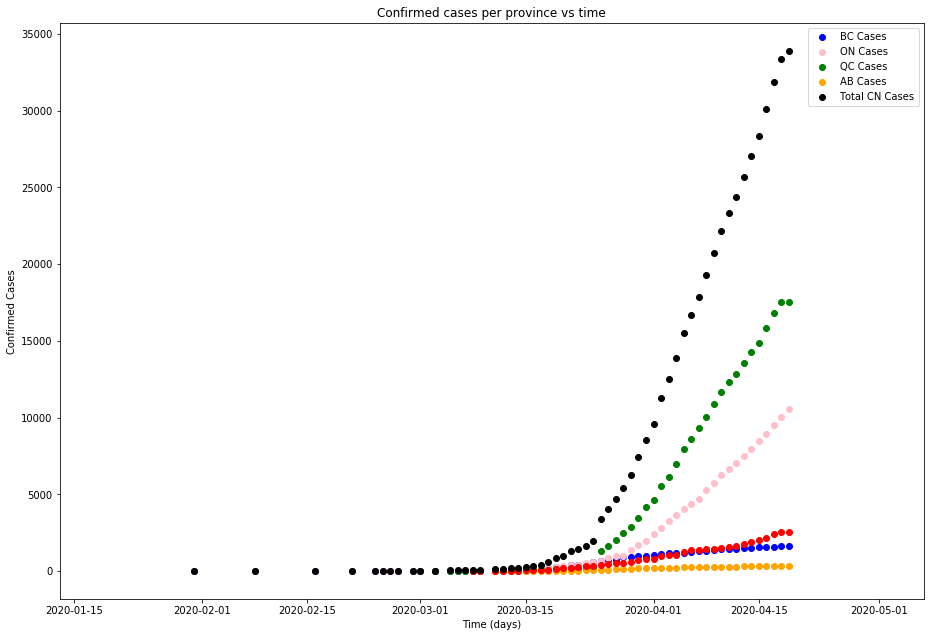

In [82]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
BC_Graph = ax.scatter(BC['Date'], BC['ConfirmedCases'], color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax.scatter(ON['Date'], ON['ConfirmedCases'], color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax.scatter(QC['Date'], QC['ConfirmedCases'], color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax.scatter(SK['Date'], SK['ConfirmedCases'], color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax.scatter(AB['Date'], AB['ConfirmedCases'], color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax.scatter(CN['Date'], CN['ConfirmedCases'], color='black')
CN_Graph.set_label('Total CN Cases')



ax.set_xlabel('Time (days)')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed cases per province vs time')
ax.legend()
plt.show()

#### Plot #

logrithmic plot. This is more important as number of cases increase at this time the linear plot works to convey the information of the growth rate of covid.

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


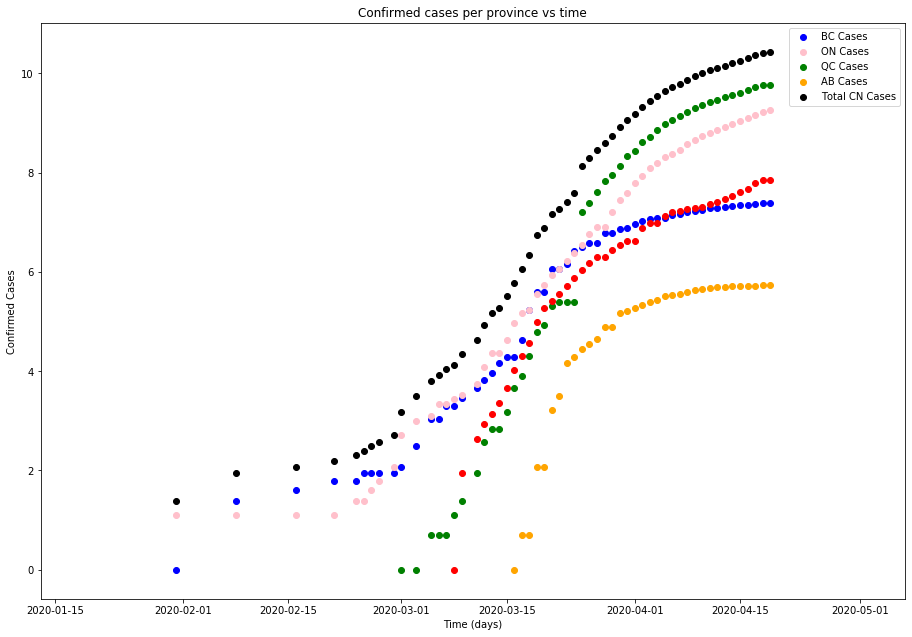

In [16]:
#develop logrithmic plot
fig1=plt.figure()
ax1=fig1.add_axes([0,0,2,2])
BC_Graph = ax1.scatter(BC['Date'], np.log(BC['ConfirmedCases']), color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax1.scatter(ON['Date'], np.log(ON['ConfirmedCases']), color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax1.scatter(QC['Date'], np.log(QC['ConfirmedCases']), color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax1.scatter(SK['Date'], np.log(SK['ConfirmedCases']), color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax1.scatter(AB['Date'], np.log(AB['ConfirmedCases']), color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax1.scatter(CN['Date'], np.log(CN['ConfirmedCases']), color='black')
CN_Graph.set_label('Total CN Cases')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Confirmed Cases')
ax1.set_title('Confirmed cases per province vs time')
ax1.legend()
plt.show()

#### Bar Graph  #

This is an interesting plot, because it will highlight how well or how poorly canada is doing. I would like to use this plot and compare it to other countries, but for now that is not the goal of this project. 

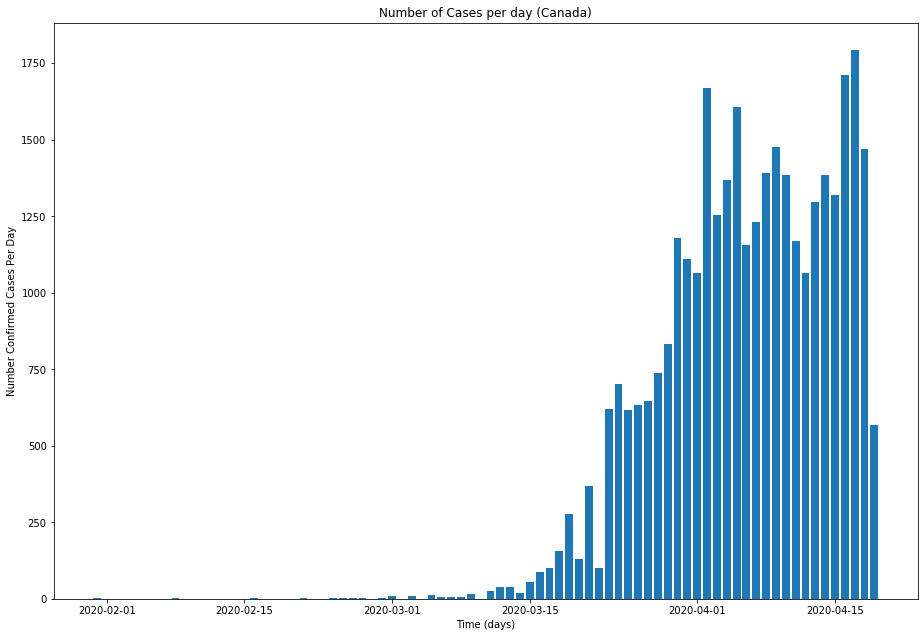

In [83]:

fig2=plt.figure()
ax2=fig2.add_axes([0,0,2,2])
CN_Graph = ax2.bar(CN['Date'], CN['TotalToday'])
CN_Graph.set_label('Total CN Cases')

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number Confirmed Cases Per Day')
ax2.set_title('Number of Cases per day (Canada)')

plt.show()

#### VS Bar Graph #

This plot is the most interesting of the bar graphs. This shows how many cases are being recorded per day in Ontario, BC and Saskatchewan. Ontario has been hit by covid very hard especially when compared to BC and SK. 

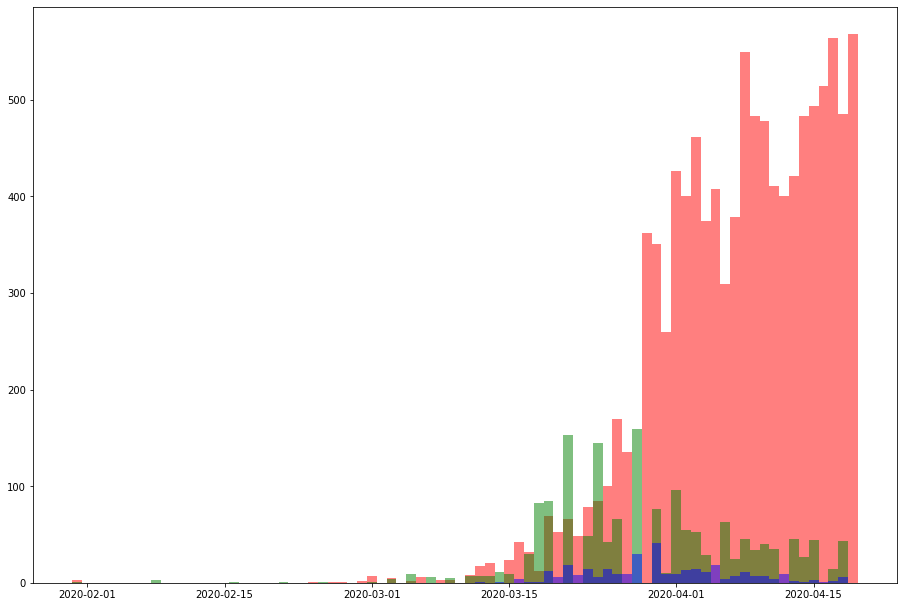

In [84]:
days = len(BC['Date'])
width = 1

fig3, ax3 = plt.subplots()
ax3 = fig3.add_axes([0,0,2,2])
#CN_Graph = ax3.bar(CN['Date'], CN['Total-Today'])
CN_Graph.set_label('Total CN Cases')
ON_Graph = ax3.bar(ON['Date'],ON['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'r')
BC_Graph = ax3.bar(BC['Date'],BC['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'g')
SK_Graph = ax3.bar(SK['Date'],SK['TotalToday'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'b')

plt.show()


# 4a) Linear Regression #
<h3> Linear Regression and Multiple Linear Regression</h3>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The independent variable (number of days) (X)</li>
    <li>The dependent variable (that we want to predict, Number of covid cases) (Y)</li>
</ul>

$$
 Y: Dependent \ Variable \ (Covid cases)\\
 X: Independent \ Variables \ (Days)
$$

 <b>Resulting linear fuction will be:</b>
$$
Yhat = a + b  X
$$

</b> where Yhat is the predicted fit </b>

Preforming linear regression, this data is not linear, however, for a sanity check it is important to prove it is not. 

In [85]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Linear Fit ####

determine linear fit, using date as the independant variable and Confirmed cases as the Dependant variable.

In [86]:
# If I preform X[['Date']] = CN[['Date']]
# X[['Date']] = CN.Date.dt.dayofyear 
# I get a "setting with copy warnning" I think its because I am prforming something on [['Date']] twice and so it is
# redunent. 
# I changed the code so CN[['Date']] is only worked on once. 
# X will be a [1,56] array and so it must be transposed to correct for the incorrect shape of the matrix.

CN_1 = CN.Date
Y = CN.ConfirmedCases
Y = Y.values.reshape(-1, 1)
X = CN_1.dt.dayofyear
X_1 = CN_1.dt.dayofyear
X = X.values.reshape(-1, 1)
#print(CN_1.Date)
#CN_1.Date = CN_1.Date.Period.dayofyear
#print(CN_1.Date)
#df_2 = df
#df_2.Date = pd.to_datetime(df_2.Date)
#df_2.head()
#print(df_2.Date.values.reshape(-1, 1))
#CN_1 = CN
#CN_1.Date = pd.to_datetime(CN_1.Date)
#CN_1.Date = pd.to_datetime(CN_1.Date)
#print(CN_1 = pd.to_datetime(CN[['Date']],strftime(j)))
#X[['Date']] = CN_1.loc[:,'Date']
#Y = CN_1[['Confirmed-Cases']]
#X[['Date']] = CN_1.Date.dt.dayofyear #inputing dates directly, will not work with lm.predict() so need to change this
#print(X)
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
#pridict the model
Yhat=lm.predict(X)

#intercept
b = lm.intercept_

#slope
m = lm.coef_

print('Equation : ','y =',b,'+',m,'*x')

Equation :  y = [-30260.04785356] + [[476.9304543]] *x


#### Linear Plot ####

It is obvious that the data is not linear. This proves sanity check.

Plot the linear fit with the actual data. This will give a good understanding if a linear model will work for this data

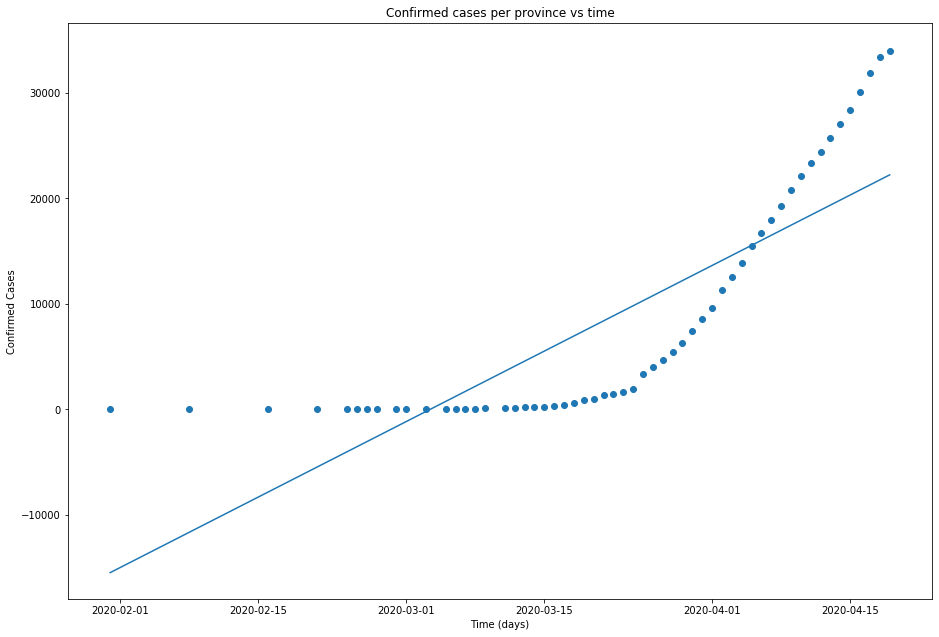

R^2:  0.6851550851201311


In [95]:
#develop logrithmic plot
fig4=plt.figure()
ax4=fig4.add_axes([0,0,2,2])
ax4.plot(CN['Date'],Yhat)
ax4.scatter(CN['Date'],CN['ConfirmedCases'])
ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Confirmed Cases')
ax4.set_title('Confirmed cases per province vs time')
plt.show()
print("R^2: ",lm.score(X,CN['ConfirmedCases']))

#### Residual plot ####

This is a residual plot. This set the fit to a mean of zero. For a good residual we want the values to be around the mean of zero. This is not true therefore we can say for certain that the linear fit is not a good model for the covid data.

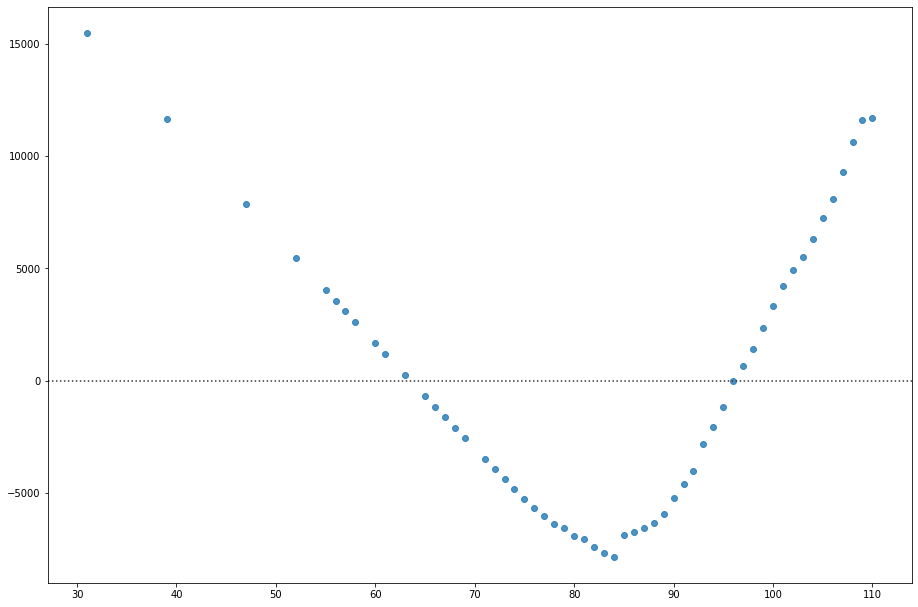

In [96]:
fig5=plt.figure()
ax5=fig5.add_axes([0,0,2,2])
sns.residplot(X,Y,data=CN)

#### Distribution Plot ####

I think for linear models, doing a distribution plot is not very important because the residual plot is better suited for this. However, I am not 100% sure what is the most prefered practice, so I will leave this in for now. 

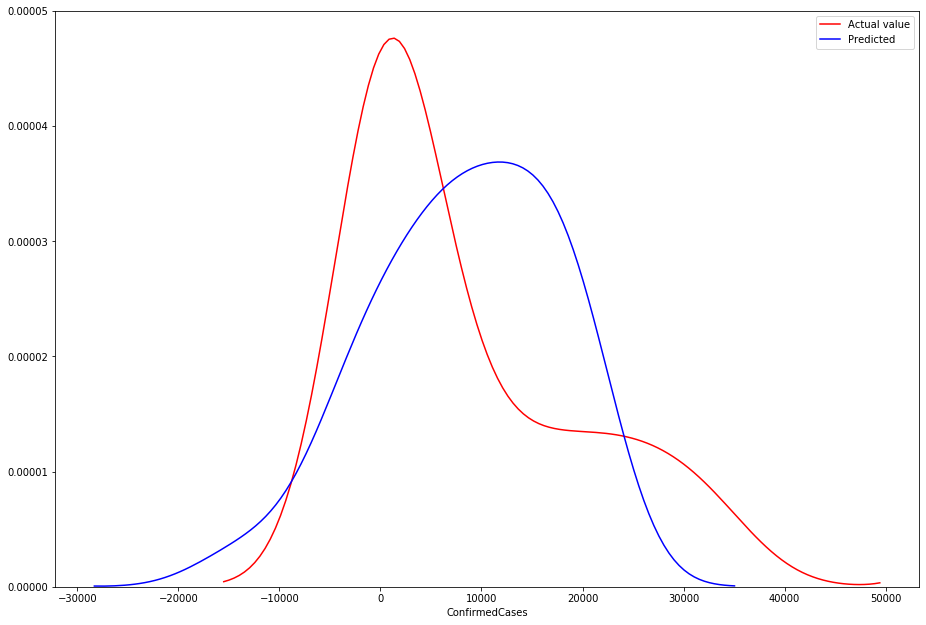

In [97]:
#Create a distribution plot
fig6=plt.figure()
ax6=fig6.add_axes([0,0,2,2])
ax6 = sns.distplot(CN['ConfirmedCases'],hist=False,color="r",label="Actual value")
sns.distplot(Yhat,hist=False,color='b', label='Predicted', ax=ax6)


# 5a) Train Test Split #

Training and testing will be split for the linear regression model. 

An important step in testing our model is to split the data into training and testing data. We will be using X as days, and Y as confirmed cases.

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 9
number of training samples: 47


#### Linear regression ####

will be developing a Linear regression model for the train and test data. 

In [102]:
lre = LinearRegression()
lre.fit(x_train,y_train)
print('R^2 for test data',lre.score(x_test,y_test))
print('R^2 for train data',lre.score(x_train,y_train))

R^2 for test data 0.642280185181845
R^2 for train data 0.6864021248951315


#### Cross validation score ####

I am nit sure if i have suffivent testing data. so i will preform a cross-validation. We will be folding the data 4 times in this case.

In [107]:
Rcross = cross_val_score(lre,X,Y,cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())


[-1.42797021e+06 -2.61446541e+02 -1.84396796e+00 -9.08483170e+00]
The mean of the folds are -357060.6454653779 and the standard deviation is 618289.9321900149


Negative R^2 means the model is overfitting the data.

# 4b) Polynomial Regression #

This section will be about the polynomial model. We will be using the polyfit from numpy to do this fitting.

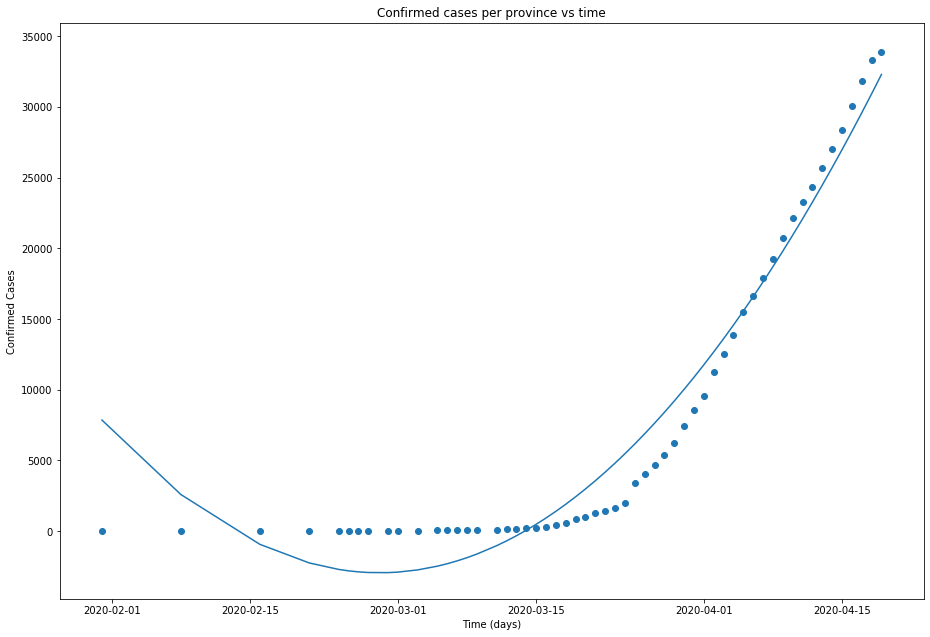

MSE predicted 5220196.005651002
R^2 =  0.955442143867452


In [36]:
X = X.ravel() # need to ravel X beacuse they are technically not 1D vectors this means that pilyfit is unable to use them
Y = Y.ravel()
f = np.polyfit(X,Y,2)
p = np.poly1d(f)

fig7=plt.figure()
ax7=fig7.add_axes([0,0,2,2])
ax7.plot(CN['Date'],p(X))
ax7.scatter(CN['Date'],CN['ConfirmedCases'])


ax7.set_xlabel('Time (days)')
ax7.set_ylabel('Confirmed Cases')
ax7.set_title('Confirmed cases per province vs time')
#ax4.legend()

plt.show()

MSE = mean_squared_error(CN['ConfirmedCases'],p(X))
R_2 = r2_score(Y,p(X)) 


print('MSE predicted',MSE)
print("R^2 = ",R_2)

#### model sel

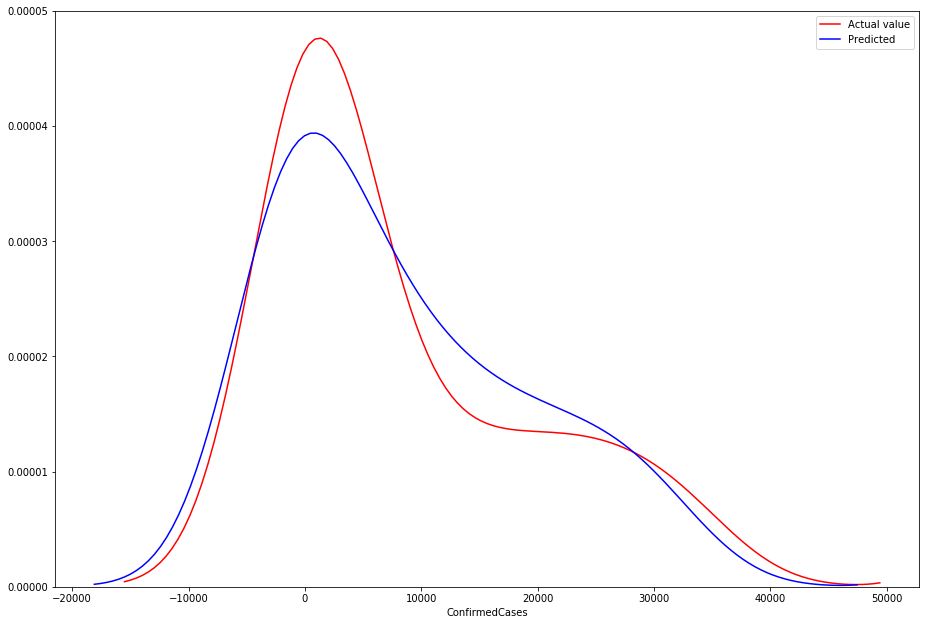

In [38]:
fig8=plt.figure()
ax8=fig8.add_axes([0,0,2,2])
ax8 = sns.distplot(CN['ConfirmedCases'],hist=False,color="r",label="Actual value")
sns.distplot(p(X),hist=False,color='b', label='Predicted', ax=ax8)


## Paper ##

I obtained thi

[2.74556002e-01 7.75675933e+00 1.17873713e-12]


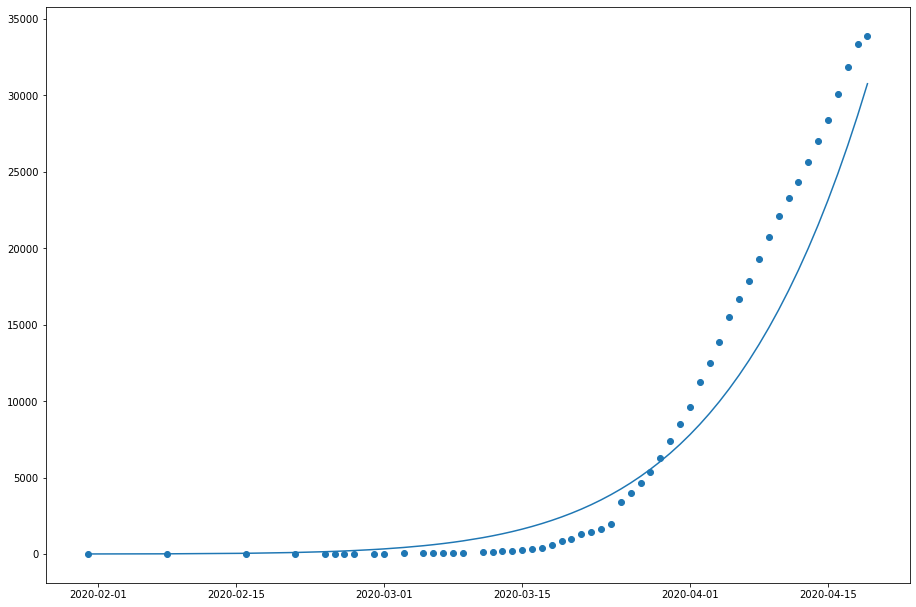

MSE predicted 8922795.922987435
MSE mean 117155457.16836736
R^2 =  0.9238379829787677


In [43]:
from scipy.optimize import curve_fit

c0 = 1
r=0.9
p=0.99
m = 1/(1-p)
A = np.power(c0,2/m)

def c_t(t,r,m,A):
    return ((r/m)*t+A)**m

def c_d(c_t,r,p):
    return (r*c_t)**p


def func(x, a, b, c):
    return a*x + b
#ydata = np.polyfit(CN_days,CN['Confirmed-Cases'],)
popt, pcov = curve_fit(c_t, X,CN['ConfirmedCases'], bounds=(0,[r, m, A]))
print(popt)
ct = c_t(X,*popt)
#print(ct)
cd = c_d(ct,r,p)
#print(cd)

fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9.plot(CN['Date'],cd)
ax9.scatter(CN['Date'],CN['ConfirmedCases'])

#print(ydata)
#fig9=plt.figure()
#ax9=fig9.add_axes([0,0,1,1])
#BC_Graph = ax9.scatter(, np.log(BC['Confirmed-Cases']), color='blue')
#ax1.plot(CN_days,np.log(ydata))

#ax9.plot(X['Date'],np.log(cd))
#ax1.plot(CN_days,c_t(CN_days,*popt))
plt.show()

MSE_predict_1 = mean_squared_error(CN['ConfirmedCases'],cd)
#CN['Mean'] = np.mean(CN['Confirmed-Cases'])
#MSE_mean = mean_squared_error(CN['Confirmed-Cases'],CN['Mean'])


R_2=(1-MSE_predict_1/MSE_mean)
print('MSE predicted',MSE_predict_1)
print('MSE mean',MSE_mean)
print("R^2 = ",R_2)



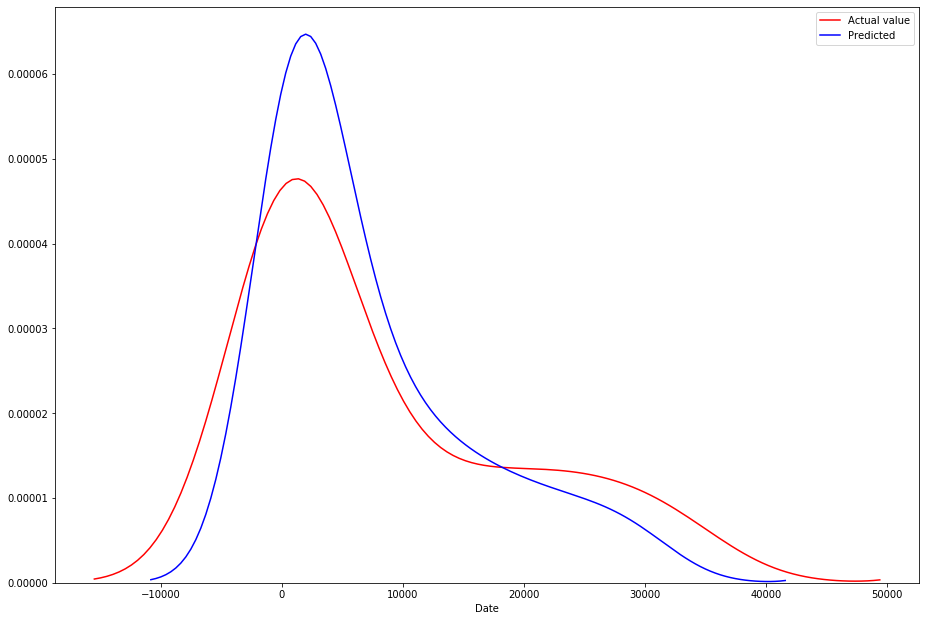

In [26]:
fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9 = sns.distplot(CN['Confirmed-Cases'],hist=False,color="r",label="Actual value")
sns.distplot(cd,hist=False,color='b', label='Predicted', ax=ax9)

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1,1), y_train.ravel())

C:\Users\Paul Kot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.reshape(-1,1)))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.reshape(-1,1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
pr = PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_Transeform(df_

In [ ]:
#import matplotlib.pyplot as plt
#fig=plt.figure()
#ax=fig.add_axes([0,0,2,2])
#plt.plot(BC['Date'], BC['Total-Today'], color='blue')

#plt.plot(BC['Date'], ON['Total-Today'], color='pink')

#plt.plot(BC['Date'], QC['Total-Today'], color='g')

#plt.plot(BC['Date'], SK['Total-Today'], color='orange')

#plt.plot(BC['Date'], AB['Total-Today'], color='red')

#plt.plot(BC['Date'], CN['Total-Today'], color='black')


#plt.set_xlabel('Time (days)')
#plt.set_ylabel('Confirmed Cases')
#plt.set_title('Confirmed cases per province vs time')
#plt.legend()
#plt.show()






##replace all the missing information. True values above indicate that there 
## missing data.

##to remove values NaN use df.dropna(subset=["Deceased"], axis=0, inplace = ture)
## axis = 0 for entire row
## axis = 1 for entire column

## to replace missing values like NAN with actual values. used 'replace'
## Calulate the mean of the column for Deceased and Precent-Today

### examples of different replacement techniques
#mean_Deceased = df['Deceased'].mean(skipna=True)
#mean_Precent = df['Precent-Today'].mean()

## replace the values that are NaN With the mean

#df['Total-Today'].replace(np.nan,mean_Total,inplace = True)
#df['Deceased'].replace(np.nan,mean_Deceased)
#df['Precent-Today'].reaplace(np.nan,mean_Precent)






#not useful, just need to remember how this works
#df_1.describe()

#True is data is null false if data exsists.
#missing_data = df.isnull()
#for column in missing_data.columns.values.tolist():
    #print(column)
    #print(missing_data[column].value_counts())
    #print()
    
    
# NOT IMPORTANT #
# do not delete for future reference.
#import datetime as dt #use this to get actual days  between cases
#CN_1.Date = pd.to_datetime(CN_1.Date)

#CN.Date.dt.dayofyear.head()
#CN['Date'] = pd.to_datetime(CN['Date']) 
#CN['Date']=CN['Date'].map(dt.datetime.toordinal) 

#CN.loc[CN.Date == 'Date', 'Date'] =  CN.Date.map(dt.datetime.toordinal)
#data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100
#CN['Date'].apply(lambda x: x.toordinal())
#CN.Date = np.arange(1,len(CN)+1)

#test = pd.DataFrame({'Date': [pd.to_datetime('2019-01-15 13:25:43')]})
#df_unix_sec = pd.to_datetime(CN['Date']).astype(int)/ 10**9
#print(df_unix_sec)

#CN[['Date']]
#for i in len(CN['Date']):
 #   print(CN[['Date',i]])